<a href="https://colab.research.google.com/github/KayHwang0529/Autism-Research/blob/main/LS50b_Week3_summary_stats_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LS50b Week 3: Summary Statistics & Hypothesis Testing

**Lab Assignment — Due February 16, 2026**

### Learning Objectives
By the end of this lab, you should be able to:
1. Calculate and interpret descriptive statistics (mean, median, variance, standard deviation)
2. Visualize distributions and understand their properties
3. Formulate null and alternative hypotheses for scientific questions
4. Conduct permutation tests to assess statistical significance
5. Interpret p-values and understand their limitations

**Remember**: Summary statistics and hypothesis tests are tools for understanding data, not replacements for thinking. Always visualize your data first, think about what patterns make biological sense, and interpret statistical results in that context.

In [63]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
# Feel free to change these settings if you want
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('ticks')
sns.set_palette('colorblind')

In [64]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1: Loading and Exploring the Data

We'll work with simulated binding data for antibody variants tested against multiple HIV Env antigens.

In [65]:
# Load the simulated data
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/week3_binding_data.csv')

# Display first few rows
print("First 10 rows of the dataset:")
print(df.head(10))

print("\nDataset shape:", df.shape)
print("\nColumn names and types:")
print(df.dtypes)

# Display the whole dataframe
df

















First 10 rows of the dataset:
   Unnamed: 0 variant_id site_1 site_2 site_3 site_4  antigen          Kd_M  \
0           0      AB001      M      M      M      M  gp120_A  5.252013e-06   
1           1      AB001      M      M      M      M  gp120_A  6.366267e-06   
2           2      AB001      M      M      M      M  gp120_A  5.009604e-06   
3           3      AB001      M      M      M      M  gp120_B  1.915330e-08   
4           4      AB001      M      M      M      M  gp120_B  1.539415e-08   
5           5      AB001      M      M      M      M  gp120_B  1.539418e-08   
6           6      AB001      M      M      M      M  gp120_C  7.847888e-10   
7           7      AB001      M      M      M      M  gp120_C  7.015297e-10   
8           8      AB001      M      M      M      M  gp120_C  5.913322e-10   
9           9      AB001      M      M      M      M  gp120_D  2.249162e-06   

   log10_Kd  replicate  
0 -5.279674          1  
1 -5.196115          2  
2 -5.300197          3  


,Unnamed: 0,variant_id,site_1,site_2,site_3,site_4,antigen,Kd_M,log10_Kd,replicate
0,0,AB001,M,M,M,M,gp120_A,5.252013e-06,-5.279674,1
1,1,AB001,M,M,M,M,gp120_A,6.366267e-06,-5.196115,2
2,2,AB001,M,M,M,M,gp120_A,5.009604e-06,-5.300197,3
3,3,AB001,M,M,M,M,gp120_B,1.915330e-08,-7.717756,1
4,4,AB001,M,M,M,M,gp120_B,1.539415e-08,-7.812644,2
...,...,...,...,...,...,...,...,...,...,...
187,187,AB016,G,G,G,G,gp120_C,2.217424e-08,-7.654151,2
188,188,AB016,G,G,G,G,gp120_C,2.003239e-08,-7.698267,3
189,189,AB016,G,G,G,G,gp120_D,3.504800e-06,-5.455337,1
190,190,AB016,G,G,G,G,gp120_D,4.954599e-08,-7.304992,2


### Exercise 1.1: Basic Data Exploration

**Task**: Answer the following questions about the dataset.

1. How many unique antibody variants are in the dataset?
2. How many different antigens were tested?
3. How many replicates were performed for each variant-antigen combination?
4. What is the range of Kd values (in nM)?

In [66]:
# Your code here
# Hint: Use .nunique() to count unique values
# Hint: Use .min() and .max() for range

unique_variants = df['variant_id'].nunique()
print('Unique antibody variants: ', unique_variants)

unique_antigens = df['antigen'].nunique()
print('Unique antigens: ', unique_antigens)

replicates = df['replicate'].nunique()
print('Number of replicates for each variant-antigen combination: ', replicates)

kd_max = df['Kd_M'].max()
kd_min = df['Kd_M'].min()
range_kd_nM = (kd_max - kd_min) * float(10**9)
print('Range of Kd values (nM): ', range_kd_nM)

Unique antibody variants:  16
Unique antigens:  4
Number of replicates for each variant-antigen combination:  3
Range of Kd values (nM):  100605.60902668803


## Part 2: Summary Statistics

Summary statistics reduce complex datasets to key numbers that describe central tendency, spread, and distribution shape.

### Measures of Central Tendency
- **Mean**: Average value, sensitive to outliers
- **Median**: Middle value, robust to outliers
- **Mode**: Most frequent value (less common for continuous data)

### Measures of Spread
- **Variance**: Average squared deviation from the mean
- **Standard Deviation**: Square root of variance, in same units as data
- **Interquartile Range (IQR)**: Range containing middle 50% of data

### Measures of Correlation
- **Pearson's correlation coefficient**: Measures the strength and direction of a linear relationship for continuous, normally distributed data; sensitive to outliers
- **Spearmans's correlation coefficient**: Measures a monotonic (consistently increasing/decreasing) relationship using ranks; and robust to outliers

### Exercise 2.1: Computing Summary Statistics

**Task**: Calculate the following summary statistics for the log10_Kd values. Compute the statistics for the entire dataset.

Compute:
1. Mean
2. Median
3. Standard deviation
4. 25th percentile (Q1)
5. 75th percentile (Q3)

In [67]:
# Your code here
# Hint: Use .describe()

kd_stats = df['log10_Kd'].describe()
kd_stats




,log10_Kd
count,192.000000
mean,-7.328686
std,0.981534
min,-9.228168
25%,-8.011427
50%,-7.441783
75%,-6.797632
max,-3.997375


### Exercise 2.2: Visualizing Distributions

**Task**: Create visualizations to understand the distribution of log10_Kd values.

Create the following plots (use 'antigen' as a color or x-variable):

1.   Histograms with varying numbers of bins
2.   Box plots
3.   Violin plots



**Question**: What do these plots tell you about the distribution? Is it symmetric? Are there outliers?

The symmetry for each antigen's distribution varies for each adiffers between types of antigens. For instance, gp120_B's distribution is relatively symmetrical but gp120_C's is not. gp120_D has a huge outlier as observed in histogram.

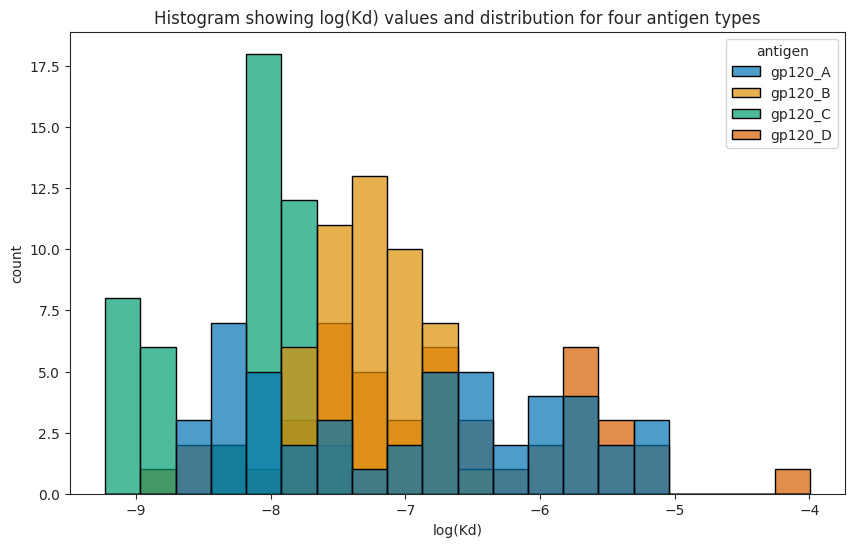

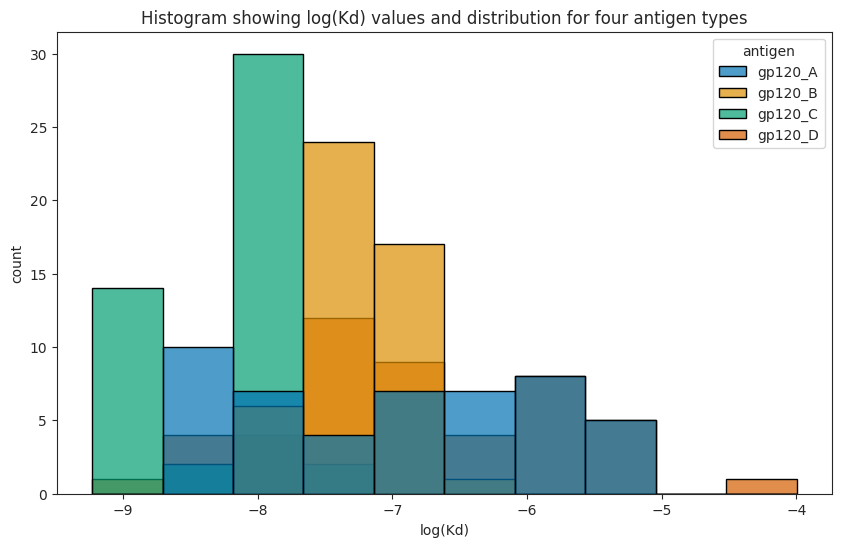

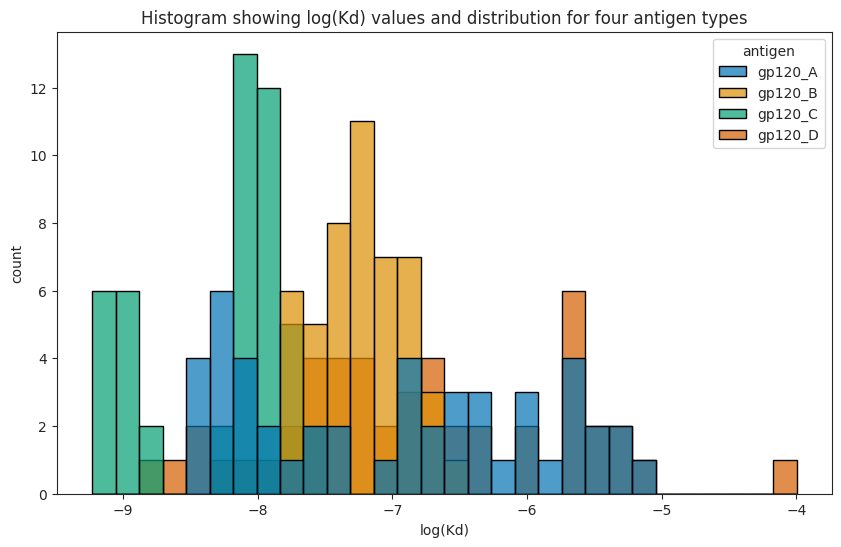

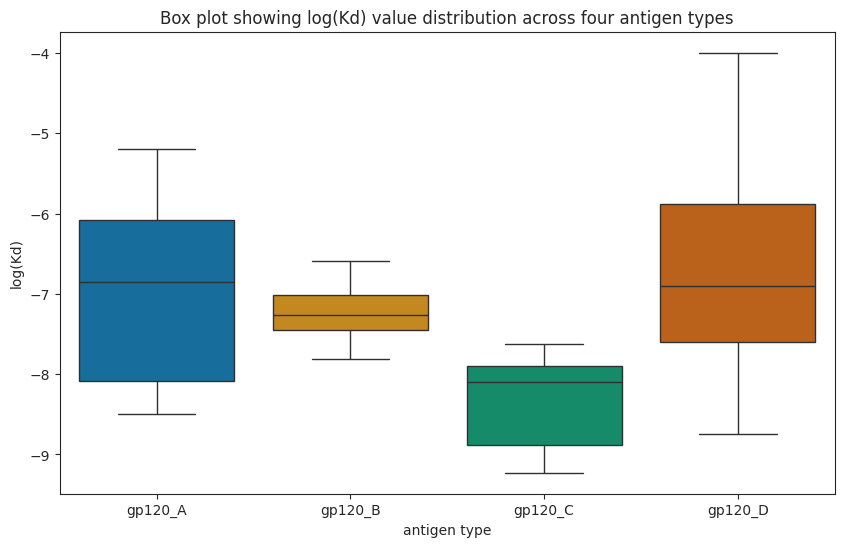

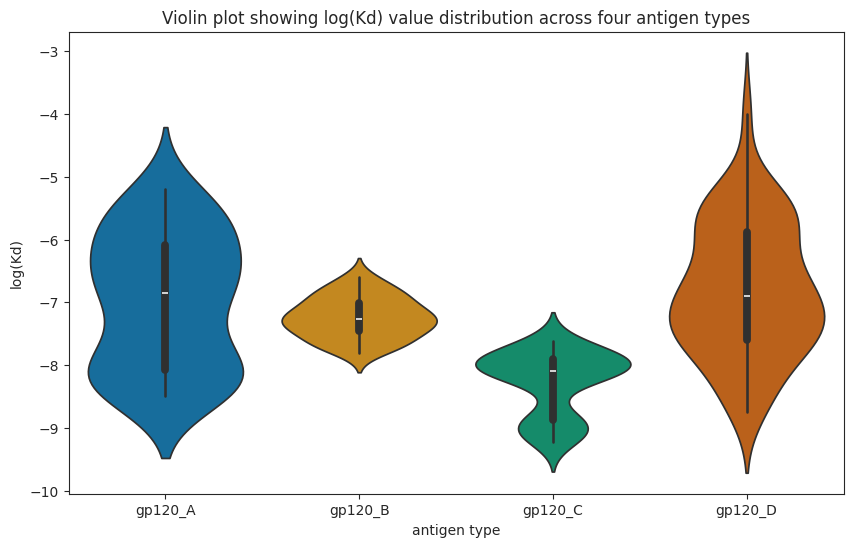

In [68]:
# Your code here

# 1. Histogram
histogram = sns.histplot(data=df, x='log10_Kd', bins=20, hue='antigen', edgecolor='black', alpha=0.7)
plt.xlabel('log(Kd)')
plt.ylabel('count')
plt.title('Histogram showing log(Kd) values and distribution for four antigen types')
plt.show()


histogram = sns.histplot(data=df, x='log10_Kd', bins=10, hue='antigen', edgecolor='black', alpha=0.7)
plt.xlabel('log(Kd)')
plt.ylabel('count')
plt.title('Histogram showing log(Kd) values and distribution for four antigen types')
plt.show()

histogram = sns.histplot(data=df, x='log10_Kd', bins=30, hue='antigen', edgecolor='black', alpha=0.7)
plt.xlabel('log(Kd)')
plt.ylabel('count')
plt.title('Histogram showing log(Kd) values and distribution for four antigen types')
plt.show()

# 2. Box plot
box_plot = sns.boxplot(data=df, x='antigen', y='log10_Kd', hue='antigen')
plt.xlabel('antigen type')
plt.ylabel('log(Kd)')
plt.title('Box plot showing log(Kd) value distribution across four antigen types')
plt.show()

# 3. Violin plot
violin_plot = sns.violinplot(data=df, x='antigen', y='log10_Kd', hue='antigen')
plt.xlabel('antigen type')
plt.ylabel('log(Kd)')
plt.title('Violin plot showing log(Kd) value distribution across four antigen types')
plt.show()





















### Exercise 2.3: Comparing Groups

**Task**: Calculate summary statistics separately for each antigen.

Use `.groupby()` to compute mean and standard deviation of log10_Kd for each antigen.

**Question**: Do different antigens show different binding profiles?

gp120_A and gp120_D show greater variations within the respective data with worse binding affinities on average than gp120_B and gp120_C. gp120_C has the highest binding affinity on average according to the data.

In [69]:
# Your code here

mean = df.groupby('antigen')['log10_Kd'].mean()
std = df.groupby('antigen')['log10_Kd'].std()
print('Mean: ', mean)
print('Standard deviation: ', std)






Mean:  antigen
gp120_A   -6.993867
gp120_B   -7.243504
gp120_C   -8.269948
gp120_D   -6.807424
Name: log10_Kd, dtype: float64
Standard deviation:  antigen
gp120_A    1.068436
gp120_B    0.325379
gp120_C    0.504140
gp120_D    1.053247
Name: log10_Kd, dtype: float64


### Exercise 2.4: Correlations

**Task**: Visualize the relationship between log10_Kd for every pair of antigens. Then compute Pearson's and Spearman's correlation coefficient for each pair.

**Hint**: Use `sns.pairplot`, `scipy.stats.pearsonr`, and `scipy.stats.spearmanr`

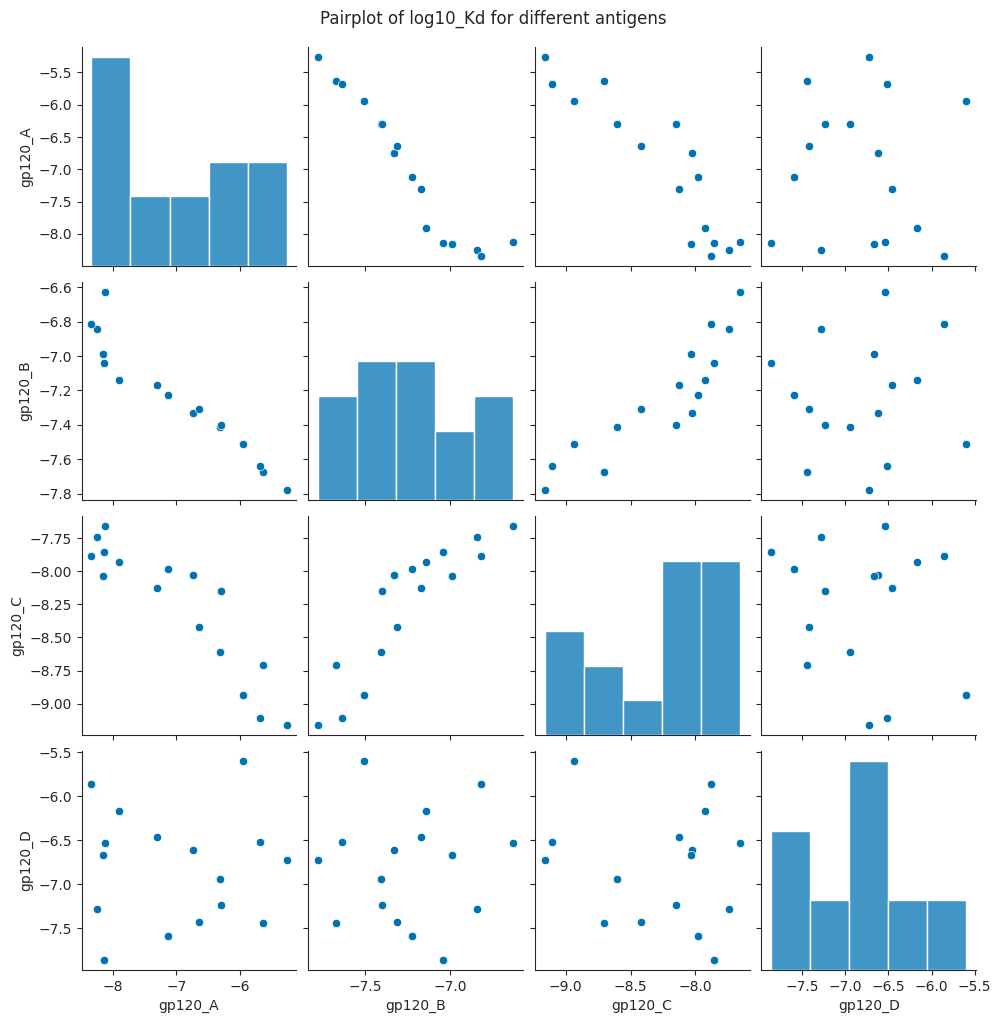


--- Correlation Coefficients ---

gp120_A vs gp120_B:
  Pearson Correlation: r=-0.954, p=1.025e-08
  Spearman Correlation: rho=-0.965, p=1.666e-09

gp120_A vs gp120_C:
  Pearson Correlation: r=-0.905, p=1.403e-06
  Spearman Correlation: rho=-0.888, p=4.326e-06

gp120_A vs gp120_D:
  Pearson Correlation: r=-0.014, p=9.600e-01
  Spearman Correlation: rho=-0.076, p=7.783e-01

gp120_B vs gp120_C:
  Pearson Correlation: r=0.894, p=3.008e-06
  Spearman Correlation: rho=0.921, p=4.320e-07

gp120_B vs gp120_D:
  Pearson Correlation: r=0.060, p=8.246e-01
  Spearman Correlation: rho=0.097, p=7.207e-01

gp120_C vs gp120_D:
  Pearson Correlation: r=-0.171, p=5.261e-01
  Spearman Correlation: rho=-0.082, p=7.617e-01


In [70]:
pivot_table = df.pivot_table(
    index='variant_id',
    columns='antigen',
    values='log10_Kd',
    aggfunc='mean'
)

# Visualize the relationships
sns.pairplot(data=pivot_table)
plt.suptitle('Pairplot of log10_Kd for different antigens', y=1.02) # Add a title for the pairplot
plt.show()

# Compute Pearson's and Spearman's correlation coefficients for each pair
antigens = pivot_table.columns

print("\n--- Correlation Coefficients ---")
for i in range(len(antigens)):
    for j in range(i + 1, len(antigens)):
        antigen1 = antigens[i]
        antigen2 = antigens[j]

        # Drop NaN values that might arise if some variants don't have data for both antigens
        # (though in this simulated dataset, it might not be strictly necessary)
        temp_df = pivot_table[[antigen1, antigen2]].dropna()

        if not temp_df.empty:
            pearson_corr, pearson_p = scipy.stats.pearsonr(temp_df[antigen1], temp_df[antigen2])
            spearman_corr, spearman_p = scipy.stats.spearmanr(temp_df[antigen1], temp_df[antigen2])

            print(f"\n{antigen1} vs {antigen2}:")
            print(f"  Pearson Correlation: r={pearson_corr:.3f}, p={pearson_p:.3e}")
            print(f"  Spearman Correlation: rho={spearman_corr:.3f}, p={spearman_p:.3e}")
        else:
            print(f"\n{antigen1} vs {antigen2}: Not enough data for correlation calculation.")

# What is your interpretation?
# Interpretation will depend on the output. Generally, a higher absolute correlation coefficient (closer to 1 or -1) indicates a stronger linear (Pearson) or monotonic (Spearman) relationship.
# A small p-value (typically < 0.05) suggests that the observed correlation is unlikely to have occurred by random chance under the null hypothesis of no correlation.
# Pearson's is sensitive to outliers and assumes linearity and normality, while Spearman's is more robust to outliers and measures any monotonic relationship.


























## Part 3: Introduction to Hypothesis Testing

### The Logic of Hypothesis Testing

Hypothesis testing helps us determine whether observed patterns in data are likely to represent real biological effects or could have arisen by random chance.

**Key Concepts:**
- **Null Hypothesis (H₀)**: The "boring" hypothesis - no effect, no difference, random chance
- **Alternative Hypothesis (H₁)**: The "interesting" hypothesis - there is a real effect
- **Test Statistic**: A number summarizing the data (e.g., difference in means)
- **p-value**: Probability of observing data as extreme as ours if H₀ is true

### The Permutation Test

A permutation test is a simple, intuitive approach to hypothesis testing:

1. Calculate the test statistic from your actual data
2. Randomly shuffle (permute) group labels many times
3. Calculate the test statistic for each permutation
4. Compare the actual test statistic to the permutation distribution
5. The p-value is the fraction of permutations with test statistics as extreme as the actual value

**Why it works**: If the null hypothesis is true (groups are the same), then shuffling labels shouldn't matter. If we observe something extreme compared to permutations, it suggests the groups really are different.

### Exercise 3.1: Do antibodies bind differently to gp120_A vs gp120_B?

In [71]:
# Step 1: Extract data for the two antigens
gp120_a = df[df['antigen'] == 'gp120_A']['log10_Kd'].values
gp120_b = df[df['antigen'] == 'gp120_B']['log10_Kd'].values

print(f"gp120_A: n={len(gp120_a)}, mean={np.mean(gp120_a):.3f}")
print(f"gp120_B: n={len(gp120_b)}, mean={np.mean(gp120_b):.3f}")

# Step 2: Calculate observed test statistic (difference in means)
observed_diff = np.mean(gp120_a) - np.mean(gp120_b)
print(f"\nObserved difference in means: {observed_diff:.3f}")


gp120_A: n=48, mean=-6.994
gp120_B: n=48, mean=-7.244

Observed difference in means: 0.250


In [72]:
# Step 3: Perform permutation test
# Run a two-sided test using scipy.stats.permutation_test
# *ensure that you use the right options for the permutation test (look at the documentation)*
def diff_in_means(x, y):
	return np.mean(x) - np.mean(y)

perm_res = sp.stats.permutation_test( data=(gp120_a, gp120_b), statistic=diff_in_means,alternative="two-sided")
print(f"p-value: {perm_res.pvalue:.4f}")

p-value: 0.1140


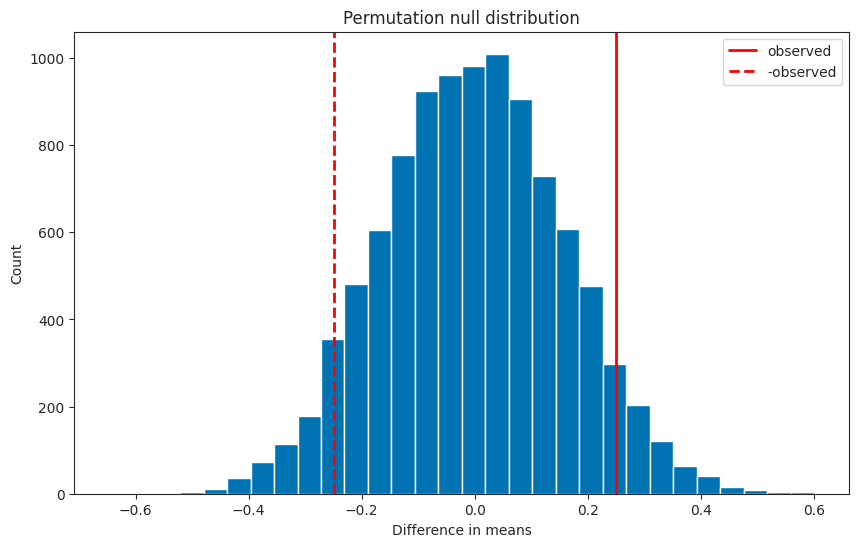

In [73]:
# Step 4: Visualize the permutation distribution

# make a histogram of the null distribution
# use plt.axvline() to plot the location of the observed_diff and -observed_diff
# on top of the distribution

plt.hist(perm_res.null_distribution, bins=30, edgecolor="white")
plt.axvline(observed_diff, color="red", linewidth=2, label="observed")
plt.axvline(-observed_diff, color="red", linestyle="--", linewidth=2, label="-observed")
plt.xlabel("Difference in means")
plt.ylabel("Count")
plt.title("Permutation null distribution")
plt.legend()
plt.show()

# What is your overall interpretation of these results?
# We assert that while the observed different in mean does seem improbable, by typical definitions of statistically significant (p < 0.05) we can't rule out the difference just being by chance.

## Part 4: The Effect of Mutations

Now let's investigate a core question: **Do specific mutations affect antibody binding?**

We'll focus on `site_3`, comparing variants with the mature residue (M) vs the germline residue (G).

### Exercise 4.1: Mutation Effect Analysis

**Task**: Test whether the mutation at site_3 affects binding to gp120_A.

1. Create two groups: variants with site_3=M and variants with site_3=G (filter for gp120_A only)
2. Visualize the distributions (box plots or violin plots work well)
3. Calculate the observed difference in mean log10_Kd
4. Perform a permutation test
5. Interpret the results

**Biological Question**: Does this mutation strengthen or weaken binding (on average)? By how much?

site_3=M: n=24, mean=-6.266
site_3=G: n=24, mean=-7.722


/tmp/ipython-input-1727139990.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([site3_m, site3_g], labels=["site_3=M", "site_3=G"])


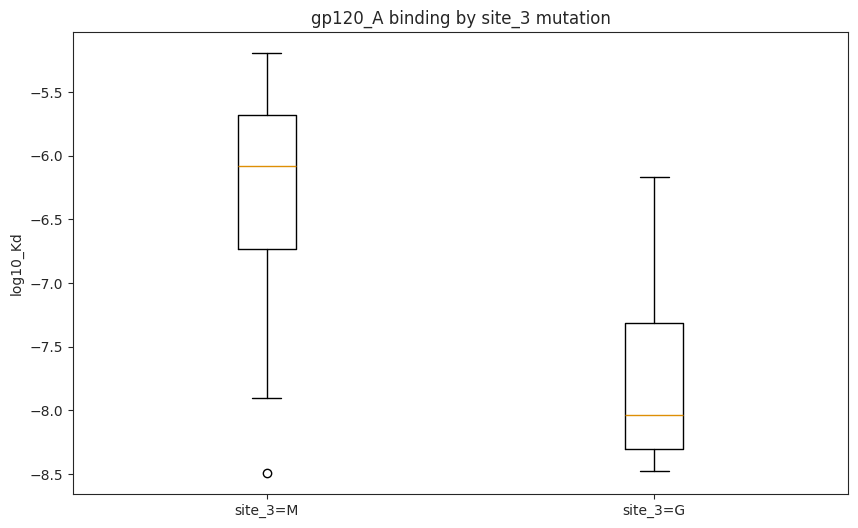

Permutation test p-value: 0.0002


" Interpretation: the binding of site3 G is stronger to a statstically significant degree. Looking at the distribution in the box plot, we can visualize the dramatic difference in mean log10_kd (G being significantly smaller) and the permuation test's p-value supports this claim by being less that 0.05."

In [74]:
# Your code here
# Step 1: Filter data
gp120a_data = df[df['antigen'] == 'gp120_A']

# Create groups based on site_3
site3_m = gp120a_data[gp120a_data['site_3'] == 'M']['log10_Kd'].values
site3_g = gp120a_data[gp120a_data['site_3'] == 'G']['log10_Kd'].values

print(f"site_3=M: n={len(site3_m)}, mean={np.mean(site3_m):.3f}")
print(f"site_3=G: n={len(site3_g)}, mean={np.mean(site3_g):.3f}")


plt.boxplot([site3_m, site3_g], labels=["site_3=M", "site_3=G"])
plt.ylabel("log10_Kd")
plt.title("gp120_A binding by site_3 mutation")
plt.show()

def diff_in_means_site3(x, y):
	return np.mean(x) - np.mean(y)

perm_res_site3 = sp.stats.permutation_test( data=(site3_m, site3_g), statistic=diff_in_means_site3, alternative="two-sided")
print(f"Permutation test p-value: {perm_res_site3.pvalue:.4f}")

''' Interpretation: the binding of site3 G is stronger to a statstically significant degree. Looking at the distribution in the box plot, we can visualize the dramatic difference in mean log10_kd (G being significantly smaller) and the permuation test's p-value supports this claim by being less that 0.05.'''

### Exercise 4.2: Context Dependence

**Task**: Test whether the effect of the site_3 mutation depends on the antigen.

For each antigen (gp120_A, gp120_B, gp120_C, gp120_D):
1. Calculate the difference in mean log10_Kd between site_3=M and site_3=G
2. Perform a permutation test
3. Create a summary table and bar plot showing the effect size and p-value for each antigen

**Question**: Does the mutation have the same effect across all antigens? Interpret both the effect sizes and p-values. What does this tell you about antibody-antigen recognition?


Context dependence summary:
   antigen  n_M  n_G  effect_size  p_value
0  gp120_A   24   24          NaN      NaN
1  gp120_A   24   24     1.455553   0.0002
2  gp120_B   24   24          NaN      NaN
3  gp120_B   24   24    -0.458753   0.0002
4  gp120_C   24   24          NaN      NaN
5  gp120_C   24   24    -0.568479   0.0002
6  gp120_D   24   24          NaN      NaN
7  gp120_D   24   24     0.186212   0.5520


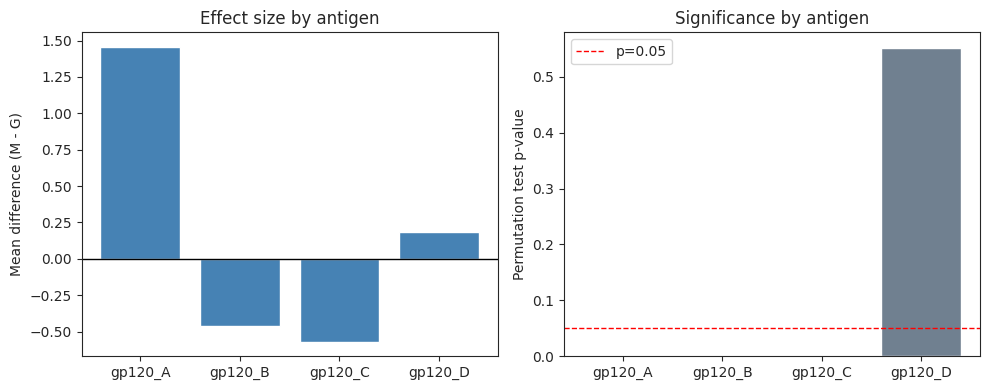

In [75]:
# Your code here
# Hint: Use a loop or list comprehension

antigens = df['antigen'].unique()
results = []

for antigen in antigens:
	antigen_data = df[df['antigen'] == antigen]
	m_vals = antigen_data[antigen_data['site_3'] == 'M']['log10_Kd'].values
	g_vals = antigen_data[antigen_data['site_3'] == 'G']['log10_Kd'].values

	results.append({
			"antigen": antigen,
			"n_M": len(m_vals),
			"n_G": len(g_vals),
			"effect_size": np.nan,
			"p_value": np.nan,
		})


	effect_size = np.mean(m_vals) - np.mean(g_vals)

	perm_res = sp.stats.permutation_test(data=(m_vals, g_vals),statistic=diff_in_means_site3, alternative="two-sided")

	results.append({
		"antigen": antigen,
		"n_M": len(m_vals),
		"n_G": len(g_vals),
		"effect_size": effect_size,
		"p_value": perm_res.pvalue,
	})

results_df = pd.DataFrame(results).sort_values("antigen")
print("\nContext dependence summary:")
print(results_df)

# Bar plot: effect size and p-value for each antigen
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(results_df["antigen"], results_df["effect_size"], color="steelblue")
axes[0].axhline(0, color="black", linewidth=1)
axes[0].set_ylabel("Mean difference (M - G)")
axes[0].set_title("Effect size by antigen")

axes[1].bar(results_df["antigen"], results_df["p_value"], color="slategray")
axes[1].axhline(0.05, color="red", linestyle="--", linewidth=1, label="p=0.05")
axes[1].set_ylabel("Permutation test p-value")
axes[1].set_title("Significance by antigen")
axes[1].legend()

plt.tight_layout()
plt.show()


## Part 5: Understanding p-values and Multiple Testing

### Important Concepts

**What a p-value is:**
- The probability of observing data as extreme as yours, *if the null hypothesis is true*
- A measure of "surprise" - how unexpected is our observation under the null?

**What a p-value is NOT:**
- The probability that the null hypothesis is true
- The probability that the result is due to chance
- A measure of effect size or biological importance

**The Multiple Testing Problem:**
If you perform 20 independent tests at α=0.05, you expect 1 false positive even if all null hypotheses are true!

### **Bonus** Exercise 5.1: Simulating False Positives (+5%)

**Task**: Demonstrate the multiple testing problem through simulation.

1. Generate 100 pairs of random samples from the same distribution (so null hypothesis is true)--e.g. use `numpy.random.normal`
2. For each pair, perform a permutation test
3. Count how many tests give p < 0.05
4. Create a histogram of the p-values

**Question**: What proportion of tests are "significant" even though there's no real difference? What should the distribution of p-values look like under the null hypothesis?

In [76]:
# Your code here
# This might take a minute to run

n_tests = 100
p_values = []

for i in range(n_tests):
    # Generate two random samples from the same distribution
    # Perform permutation test
    # Store p-value
    pass


## Questions to ponder

(you don't have to write an answer)

1. **A collaborator tells you: "We got p=0.03, so there's only a 3% chance our result is due to chance." What do you think about this interpretation?**

2. **You perform 50 comparisons and find 3 with p<0.05. Should you be excited? Why or why not?**

3. **How might you use statistical tests alongside biological knowledge to interpret antibody binding data?**

## Summary

Today you learned:
- How to compute and interpret summary statistics
- How to visualize distributions effectively
- The logic of hypothesis testing and permutation tests
- How to calculate and interpret p-values and effect sizes
- The multiple testing problem
- How to apply these tools to real biological questions

**Key Takeaway**: Statistical tools help us quantify uncertainty and separate signal from noise. But they're most powerful when combined with biological insight, careful experimental design, and critical thinking about what the numbers mean.